In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
import missingno as msno
import openpyxl
import sklearn
import urllib.request
from PIL import Image
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
os.chdir("C:\\src\\")
from utility import utils as u
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import math
from numpy import mean
from numpy import std
from numpy import absolute
from numpy import sqrt
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, r2_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lars
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import joblib 
import time

In [2]:
os.chdir("C:\\src\\data\\raw\\")  # Establecemos el directorio de trabajo


In [3]:
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\src\\data\\raw'

In [4]:
df1=u.cargar_fichero("FIFA18_official_data.csv","01/09/2018")
df2=u.cargar_fichero("FIFA19_official_data.csv","01/09/2019")
df3=u.cargar_fichero("FIFA20_official_data.csv","01/09/2020")
df4=u.cargar_fichero("FIFA21_official_data.csv","01/09/2021")
df5=u.cargar_fichero("FIFA22_official_data.csv","01/09/2022")

In [5]:
data_Fifa=u.concatenar(df1,df2,df3,df4,df5) # definir argumentos
data_Fifa=u.limpiar_df(data_Fifa)
data_Fifa=u.peso(data_Fifa)
data_Fifa=u.altura(data_Fifa)
data_Fifa=u.cambios_nombre(data_Fifa)
data_Fifa=u.ligas_pais_ano(data_Fifa)
data_Fifa =u.modificar_dataframe(data_Fifa)

In [163]:
data_Fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18365 entries, 0 to 86783
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18365 non-null  int64         
 1   Name                      18365 non-null  object        
 2   Age                       18365 non-null  int64         
 3   Photo                     18365 non-null  object        
 4   Nationality               18365 non-null  object        
 5   Overall                   18365 non-null  int64         
 6   Potential                 18365 non-null  int64         
 7   Club                      18365 non-null  object        
 8   Club_Logo                 18365 non-null  object        
 9   Value                     18365 non-null  object        
 10  Wage                      18365 non-null  object        
 11  Special                   18365 non-null  int64         
 12  Preferred_Foot    

**MINI EDA*** 

# Vemos los tipos de variables

In [164]:
data_Fifa.describe()

,ID,Age,Overall,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Jersey_Number,Height,...,POS,Best_Overall_Rating,Foot,inc,PAC,SHO,PAS,DRI,DEF,PHY
count,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,18365.000000,...,18365.000000,18365.000000,14515.000000,14515.000000,18365.000000,18338.000000,18338.000000,18155.000000,18338.000000,18338.000000
mean,212949.205227,24.844977,70.806589,76.397386,1693.853471,1.365478,3.018622,2.553607,22.043833,182.031339,...,16.911244,71.099864,168.705698,13.285521,65.502995,50.513306,52.877195,59.765381,49.964838,58.836610
std,38124.112847,4.953661,7.586533,5.628452,291.659091,0.685082,0.677839,0.859635,16.964137,6.584850,...,19.343307,7.441030,15.203217,10.550469,14.359774,21.922847,21.548413,22.527443,23.545442,22.417815
min,2.000000,16.000000,38.000000,55.000000,731.000000,1.000000,1.000000,1.000000,1.000000,160.020000,...,1.000000,42.000000,152.400000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197031.000000,21.000000,65.000000,72.000000,1528.000000,1.000000,3.000000,2.000000,10.000000,177.800000,...,8.000000,66.000000,152.400000,2.540000,58.000000,40.000000,46.500000,58.166667,34.600000,55.750000
50%,220659.000000,24.000000,72.000000,76.000000,1736.000000,1.000000,3.000000,3.000000,19.000000,182.880000,...,11.000000,72.000000,182.880000,10.160000,68.000000,56.000000,57.833333,66.333333,56.800000,65.250000
75%,239015.000000,28.000000,76.000000,80.000000,1911.000000,2.000000,3.000000,3.000000,30.000000,187.000000,...,14.000000,76.000000,182.880000,22.860000,75.500000,66.166667,67.166667,72.500000,69.000000,72.500000
max,264699.000000,43.000000,94.000000,95.000000,2349.000000,5.000000,5.000000,5.000000,99.000000,203.200000,...,93.000000,94.000000,182.880000,27.940000,97.000000,91.833333,92.166667,95.333333,90.400000,89.750000


# Verificamos si existen nulos y eliminamos estos

In [165]:
data_Fifa.describe(include='all')

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club_Logo,Value,...,Year,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY
count,18365.000000,18365,18365.000000,18365,18365,18365.000000,18365.000000,18365,18365,18365,...,18365,14515.000000,14515.000000,18365,18365.000000,18338.000000,18338.000000,18155.000000,18338.000000,18338.000000
unique,NaN,10484,NaN,15002,134,NaN,NaN,114,234,270,...,5,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Danilo,NaN,https://cdn.sofifa.com/players/201/990/18_60.png,Spain,NaN,NaN,Paris S-G,https://cdn.sofifa.com/teams/11/light_30.png,5.5,...,2021-01-09 00:00:00,NaN,NaN,ENG,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,4,3247,NaN,NaN,320,170,409,...,3999,NaN,NaN,4703,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2018-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2022-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,212949.205227,NaN,24.844977,NaN,NaN,70.806589,76.397386,NaN,NaN,NaN,...,NaN,168.705698,13.285521,NaN,65.502995,50.513306,52.877195,59.765381,49.964838,58.836610
std,38124.112847,NaN,4.953661,NaN,NaN,7.586533,5.628452,NaN,NaN,NaN,...,NaN,15.203217,10.550469,NaN,14.359774,21.922847,21.548413,22.527443,23.545442,22.417815
min,2.000000,NaN,16.000000,NaN,NaN,38.000000,55.000000,NaN,NaN,NaN,...,NaN,152.400000,0.000000,NaN,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197031.000000,NaN,21.000000,NaN,NaN,65.000000,72.000000,NaN,NaN,NaN,...,NaN,152.400000,2.540000,NaN,58.000000,40.000000,46.500000,58.166667,34.600000,55.750000


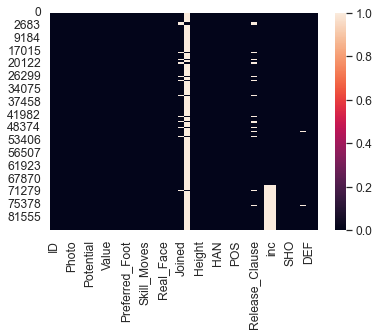

In [166]:
#Analizamos datos vemos las columnas que contienen nulos y adaptamos lo que necesitamos , ver memoria
sns.heatmap(data_Fifa.isnull(),cbar=True);

In [167]:
data_Fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Club_Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred_Foot                  0
International_Reputation        0
Weak_Foot                       0
Skill_Moves                     0
Work_Rate                       0
Body_Type                      21
Real_Face                      21
Position                        0
Jersey_Number                   0
Joined                       1564
Loaned_From                 16834
Contract_Valid_Until            2
Height                          0
Weight                          0
DIV                             0
HAN                             0
KIC                             0
REF           

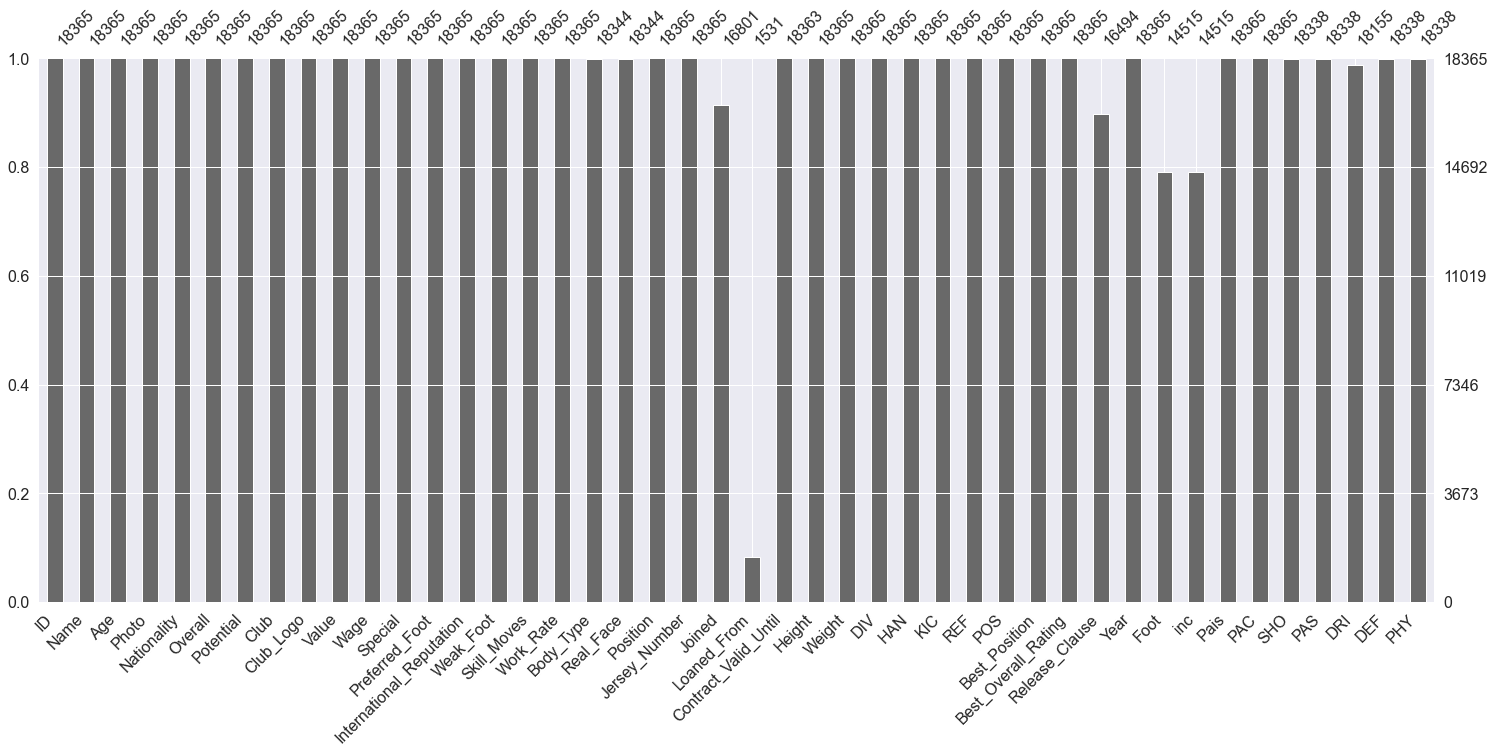

In [168]:
msno.bar(data_Fifa);

## Eliminamos nulos asignando los valores de las medias de cada variable

In [6]:
data_Fifa=data_Fifa.fillna(data_Fifa.mean())

In [170]:
data_Fifa

,ID,Name,Age,Photo,Nationality,Overall,Potential,Club,Club_Logo,Value,...,Year,Foot,inc,Pais,PAC,SHO,PAS,DRI,DEF,PHY
0,176580,L. Suárez,30,https://cdn.sofifa.com/players/176/580/18_60.png,Uruguay,92,92,Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,97,...,2018-01-09,182.880000,0.000000,ESP,82.5,88.666667,79.666667,86.500000,46.2,82.00
1,178518,R. Nainggolan,29,https://cdn.sofifa.com/players/178/518/18_60.png,Belgium,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,42.5,...,2018-01-09,152.400000,22.860000,ITA,78.0,78.666667,75.833333,83.500000,79.4,83.50
2,203551,A. Florenzi,26,https://cdn.sofifa.com/players/203/551/18_60.png,Italy,82,83,Roma,https://cdn.sofifa.com/teams/52/light_30.png,21,...,2018-01-09,152.400000,20.320000,ITA,85.0,80.833333,77.000000,82.166667,75.6,77.75
3,197445,D. Alaba,25,https://cdn.sofifa.com/players/197/445/18_60.png,Austria,85,87,Bayern Munich,https://cdn.sofifa.com/teams/21/light_30.png,38.5,...,2018-01-09,152.400000,27.940000,GER,83.5,75.666667,80.666667,80.166667,79.8,76.75
4,195864,P. Pogba,24,https://cdn.sofifa.com/players/195/864/18_60.png,France,88,92,Manchester Utd,https://cdn.sofifa.com/teams/11/light_30.png,76,...,2018-01-09,182.880000,7.620000,ENG,76.5,81.500000,84.833333,81.000000,69.4,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86761,245542,G. Figliuzzi,20,https://cdn.sofifa.com/players/245/542/22_60.png,Italy,49,64,Crotone,https://cdn.sofifa.com/teams/110734/30.png,100,...,2022-01-09,168.705698,13.285521,ITA,21.0,0.000000,0.000000,0.000000,0.0,0.00
86764,260154,G. Bellagambi,19,https://cdn.sofifa.com/players/260/154/22_60.png,England,54,73,Huddersfield,https://cdn.sofifa.com/teams/1939/30.png,250,...,2022-01-09,168.705698,13.285521,ENG,23.0,0.000000,0.000000,0.000000,0.0,0.00
86772,264460,P. Zovko,19,https://cdn.sofifa.com/players/264/460/22_60.png,Bosnia and Herzegovina,58,73,Spezia,https://cdn.sofifa.com/teams/110741/30.png,425,...,2022-01-09,168.705698,13.285521,ITA,20.0,0.000000,0.000000,0.000000,0.0,0.00
86773,259973,P. Boer,19,https://cdn.sofifa.com/players/259/973/22_60.png,Italy,54,74,Roma,https://cdn.sofifa.com/teams/52/30.png,275,...,2022-01-09,168.705698,13.285521,ITA,28.5,0.000000,0.000000,0.000000,0.0,0.00


# Miramos la correlación 

In [171]:
# Show 44 features with most correlation ratio - Pearson
corr = data_Fifa.corr(method='pearson')
print (corr['Overall'].sort_values(ascending=False)[:25], '\n')


Overall                     1.000000
Best_Overall_Rating         0.987122
Potential                   0.638610
Special                     0.621388
International_Reputation    0.616378
Age                         0.556414
PAS                         0.361750
SHO                         0.328361
Skill_Moves                 0.318247
DRI                         0.292978
PHY                         0.277398
DEF                         0.273396
Weak_Foot                   0.240959
PAC                         0.225373
Weight                      0.179322
Foot                        0.045355
Height                      0.040265
REF                         0.007228
POS                         0.002364
KIC                         0.001614
HAN                         0.001028
DIV                        -0.000558
inc                        -0.039752
Jersey_Number              -0.422851
ID                         -0.457148
Name: Overall, dtype: float64 



In [172]:
print (corr['Overall'].sort_values(ascending=False)[-20:])

Age              0.556414
PAS              0.361750
SHO              0.328361
Skill_Moves      0.318247
DRI              0.292978
PHY              0.277398
DEF              0.273396
Weak_Foot        0.240959
PAC              0.225373
Weight           0.179322
Foot             0.045355
Height           0.040265
REF              0.007228
POS              0.002364
KIC              0.001614
HAN              0.001028
DIV             -0.000558
inc             -0.039752
Jersey_Number   -0.422851
ID              -0.457148
Name: Overall, dtype: float64


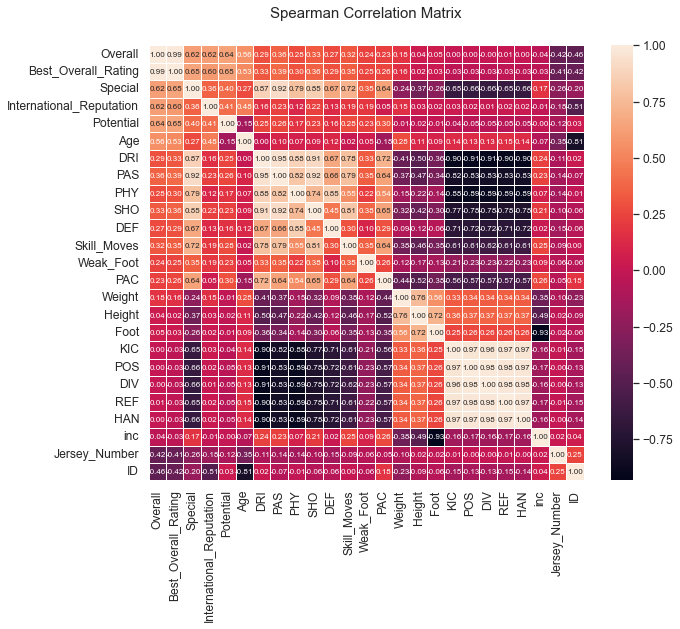

In [173]:
# Sales correlation matrix
k = 44 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = data_Fifa.corr(method='spearman')
# picking the top 50 correlated features
cols15 = corrmat.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa[cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

# Separamos modelos para ver si mejoran los valores de la correlacion

In [7]:
data_Fifa_FOT=data_Fifa[(data_Fifa['Best_Position'] != "GK")]

In [175]:
data_Fifa_GK=data_Fifa[(data_Fifa['Best_Position'] == "GK")]

In [8]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_FOT=data_Fifa_FOT.drop(["DIV","HAN","KIC","REF","POS"], axis =1)

In [177]:
# Eliminamos las variables de los modelos  que no son dependientes del tipo de jugador
data_Fifa_GK=data_Fifa_GK.drop(["PAS","SHO","PHY","DRI","DEF"], axis =1)

# Verificamos de nuevo la correlacion con los dos modelos separados, jugadores de campo y porteros

In [178]:
# Show 44 features with most correlation ratio - Pearson
corr = data_Fifa_FOT.corr(method='pearson')
print (corr['Overall'].sort_values(ascending=False)[:44], '\n')


Overall                     1.000000
Best_Overall_Rating         0.985998
Special                     0.819645
DRI                         0.698169
PAS                         0.650524
Potential                   0.622931
International_Reputation    0.616200
PHY                         0.599150
Age                         0.564794
SHO                         0.510901
Skill_Moves                 0.391886
DEF                         0.370130
Weak_Foot                   0.244319
PAC                         0.197140
Weight                      0.195773
Foot                        0.067007
Height                      0.059349
inc                        -0.059652
Jersey_Number              -0.428157
ID                         -0.472086
Name: Overall, dtype: float64 



In [179]:
data_Fifa_FOT.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Overall', 'Potential',
       'Club', 'Club_Logo', 'Value', 'Wage', 'Special', 'Preferred_Foot',
       'International_Reputation', 'Weak_Foot', 'Skill_Moves', 'Work_Rate',
       'Body_Type', 'Real_Face', 'Position', 'Jersey_Number', 'Joined',
       'Loaned_From', 'Contract_Valid_Until', 'Height', 'Weight',
       'Best_Position', 'Best_Overall_Rating', 'Release_Clause', 'Year',
       'Foot', 'inc', 'Pais', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [180]:
print (corr['Overall'].sort_values(ascending=False)[-6:])

Weight           0.195773
Foot             0.067007
Height           0.059349
inc             -0.059652
Jersey_Number   -0.428157
ID              -0.472086
Name: Overall, dtype: float64


In [181]:
# Show 44 features with most correlation ratio - Pearson
corr2 = data_Fifa_GK.corr(method='pearson')
print (corr2['Overall'].sort_values(ascending=False)[:44], '\n')


Overall                     1.000000
Best_Overall_Rating         0.997945
REF                         0.960918
DIV                         0.959533
POS                         0.957540
HAN                         0.952496
Special                     0.853603
KIC                         0.798413
Potential                   0.724096
International_Reputation    0.627528
Age                         0.574857
PAC                         0.568669
Weight                      0.342557
Weak_Foot                   0.168277
Height                      0.150820
inc                         0.047570
Foot                        0.030195
Jersey_Number              -0.388750
ID                         -0.444049
Skill_Moves                      NaN
Name: Overall, dtype: float64 



In [9]:
data_Fifa_FOT=u.borrar(data_Fifa_FOT)

In [183]:
data_Fifa_GK=u.borrar(data_Fifa_GK)

In [184]:
dff=data_Fifa_FOT

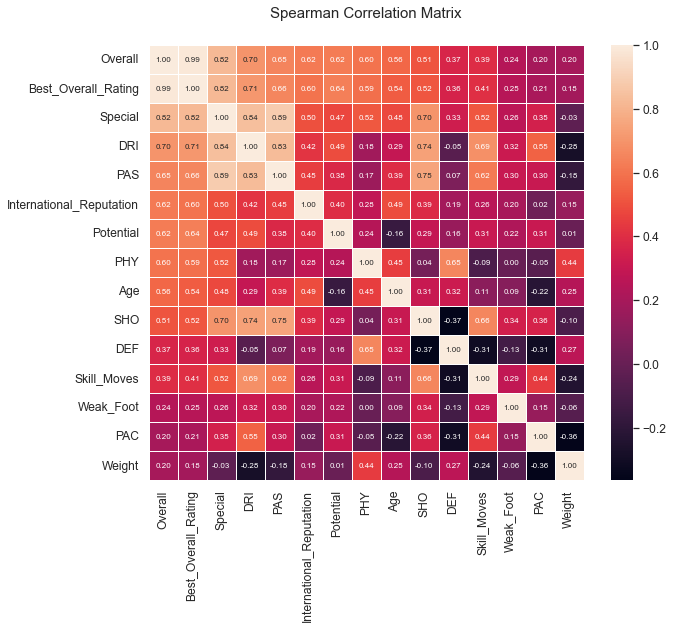

In [185]:
# Sales correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat = data_Fifa_FOT.corr(method='spearman')
# picking the top 50 correlated features
cols15 = corrmat.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa_FOT[cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

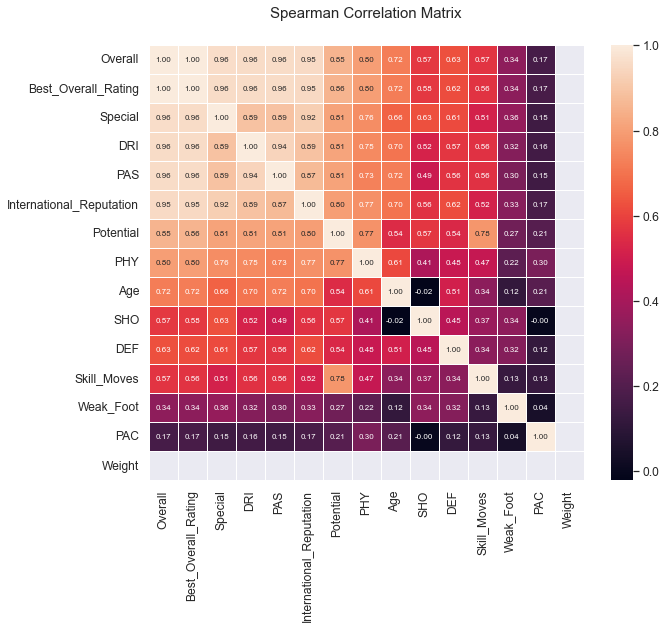

In [186]:
# Sales correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(10,8))
corrmat2 = data_Fifa_GK.corr(method='spearman')
# picking the top 50 correlated features
cols25 = corrmat2.nlargest(k, 'Overall')['Overall'].index
cm = np.corrcoef(data_Fifa_GK[cols25].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values, linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

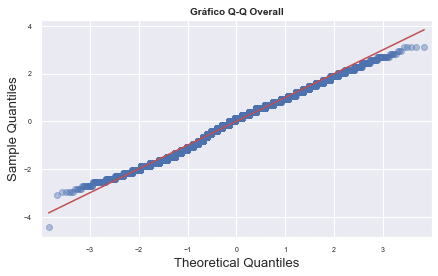

In [187]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa_FOT["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

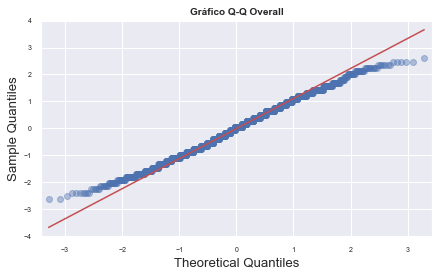

In [188]:
import statsmodels.api as sm
# Gráfico Q-Q
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    data_Fifa_GK["Overall"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Overall', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [189]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa_FOT.Overall);  # convertirla en normal raiz cuadrado, exponencial logaritmico
shapiro_test

ShapiroResult(statistic=0.9905848503112793, pvalue=3.0050951192472087e-31)

In [190]:
#Shapiro Wilk
shapiro_test = stats.shapiro(data_Fifa_GK.Overall);  # convertirla en normal raiz cuadrado, exponencial logaritmico
shapiro_test

ShapiroResult(statistic=0.9934202432632446, pvalue=9.568863390541082e-08)

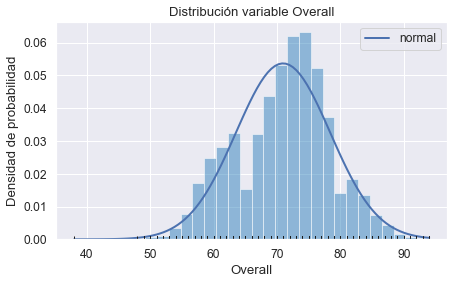

In [191]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa_FOT["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa_FOT["Overall"]), max(data_Fifa_FOT["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa_FOT["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa_FOT["Overall"], np.full_like(data_Fifa_FOT["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

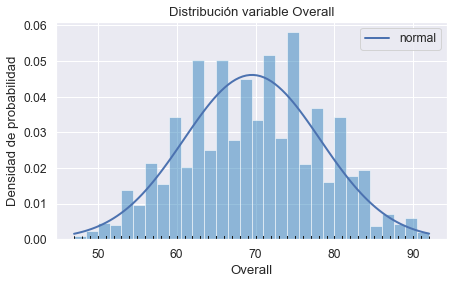

In [192]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data_Fifa_GK["Overall"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(data_Fifa_GK["Overall"]), max(data_Fifa_GK["Overall"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data_Fifa_GK["Overall"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_Fifa_GK["Overall"], np.full_like(data_Fifa_GK["Overall"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución variable Overall')
ax.set_xlabel('Overall')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [193]:
#D'Agostino
stat_fil, p_value_fil =stats.normaltest(data_Fifa_FOT.Overall)
stat_fil2, p_value_fil2 =stats.normaltest(data_Fifa_GK.Overall)

In [194]:
p_value_fil, p_value_fil2

(3.614349807916987e-46, 1.0594535659204585e-10)

*** PREPARACION DE DATOS PARA EL MODELO DE ML ***

## Revisamos el formato de las variables , eliminamos categoricas que no aportan 
## nada y convertimos las variables que nos interesan de objeto a float

In [195]:
data_Fifa_FOT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16380 entries, 0 to 85697
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       16380 non-null  int64  
 1   Overall                   16380 non-null  int64  
 2   Potential                 16380 non-null  int64  
 3   Value                     16380 non-null  object 
 4   Wage                      16380 non-null  object 
 5   Special                   16380 non-null  int64  
 6   Preferred_Foot            16380 non-null  object 
 7   International_Reputation  16380 non-null  float64
 8   Weak_Foot                 16380 non-null  float64
 9   Skill_Moves               16380 non-null  float64
 10  Work_Rate                 16380 non-null  object 
 11  Loaned_From               1438 non-null   object 
 12  Weight                    16380 non-null  float64
 13  Best_Position             16380 non-null  object 
 14  Best_O

In [196]:
data_Fifa_FOT["Value"]

0          97
1        42.5
2          21
3        38.5
4          76
         ... 
85448     190
85456     210
85465     350
85539     130
85697     525
Name: Value, Length: 16380, dtype: object

In [197]:
data_Fifa_FOT["Wage"]

0        500
1        130
2         70
3        130
4        250
        ... 
85448      3
85456      4
85465    500
85539      2
85697      8
Name: Wage, Length: 16380, dtype: object

In [198]:
data_Fifa_FOT["Work_Rate"]

0          High/ Medium
1            High/ High
2          High/ Medium
3          High/ Medium
4             High/ Low
              ...      
85448    Medium/ Medium
85456    Medium/ Medium
85465    Medium/ Medium
85539    Medium/ Medium
85697      Medium/ High
Name: Work_Rate, Length: 16380, dtype: object

In [199]:
data_Fifa_FOT["Best_Position"]

0         CF
1        CDM
2         CF
3         LB
4         CM
        ... 
85448     CB
85456     CB
85465     CB
85539     CB
85697     CB
Name: Best_Position, Length: 16380, dtype: object

In [10]:
data_Fifa_FOT=data_Fifa_FOT.drop(["Value","Wage","Best_Position","Work_Rate","Loaned_From"], axis =1)

In [201]:
data_Fifa_GK=data_Fifa_GK.drop(["Value","Wage","Best_Position","Work_Rate","Loaned_From"], axis =1)

# categorizamos las variables objetos

In [11]:
# We convert Categorical to boolean for first dataset  (Prefered foot)
categorical_feature = (data_Fifa_FOT.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_FOT.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_FOT = pd.get_dummies(data_Fifa_FOT, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )

In [12]:
# We convert Categorical to boolean for first dataset
categorical_feature = (data_Fifa_GK.drop(columns='Overall').dtypes == "object")

# filter categorical columns
categorical_cols = data_Fifa_GK.drop(columns='Overall').columns[categorical_feature].tolist()

# Binarize categorical values
data_Fifa_GK = pd.get_dummies(data_Fifa_GK, columns=categorical_cols,
prefix=categorical_cols, drop_first=True )

NameError: name 'data_Fifa_GK' is not defined

# normalizamos las variables numericas para que esten todas a escala, exceptuando overall

In [13]:
# Min-Max Normalization (Min-max escaler)
data_Fifa2_1 = data_Fifa_FOT.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_FOT.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_FOT["Overall"]

data_Fifa_FOT=data_Fifa2_norm

In [205]:
data_Fifa_FOT

,Age,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Weight,Best_Overall_Rating,PAC,SHO,PAS,DRI,DEF,PHY,Preferred_Foot_Right,Overall
0,0.538462,0.925,0.980782,1.00,0.75,0.75,0.707902,0.884615,0.797203,0.959315,0.819712,0.853186,0.402703,0.870293,1.0,92
1,0.500000,0.775,0.956760,0.50,0.50,0.50,0.530927,0.807692,0.734266,0.830835,0.764423,0.803324,0.851351,0.895397,1.0,86
2,0.384615,0.700,0.943720,0.50,0.50,0.50,0.336195,0.750000,0.832168,0.858672,0.781250,0.781163,0.800000,0.799163,1.0,82
3,0.346154,0.800,0.940975,0.75,0.75,0.50,0.513171,0.769231,0.811189,0.792291,0.834135,0.747922,0.856757,0.782427,0.0,85
4,0.307692,0.925,0.940288,0.75,0.75,1.00,0.663610,0.826923,0.713287,0.867238,0.894231,0.761773,0.716216,0.941423,1.0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85448,0.153846,0.225,0.228552,0.00,0.50,0.25,0.489756,0.250000,0.454545,0.160600,0.103365,0.108033,0.513514,0.518828,1.0,53
85456,0.153846,0.325,0.227865,0.00,0.50,0.25,0.489756,0.250000,0.384615,0.169165,0.122596,0.132964,0.486486,0.493724,1.0,53
85465,0.076923,0.400,0.226493,0.00,0.50,0.25,0.489756,0.326923,0.419580,0.100642,0.103365,0.146814,0.564865,0.481172,1.0,57
85539,0.115385,0.275,0.214139,0.00,0.50,0.25,0.294634,0.211538,0.461538,0.184154,0.074519,0.099723,0.508108,0.422594,1.0,51


In [206]:
# Min-Max Normalization
data_Fifa2_1 = data_Fifa_GK.drop('Overall', axis=1)
data_Fifa2_norm = (data_Fifa2_1-data_Fifa2_1.min())/(data_Fifa2_1.max()-data_Fifa2_1.min())
data_Fifa2_norm = pd.concat((data_Fifa2_norm, data_Fifa_GK.Overall), 1)


data_Fifa2_norm["Overall"]=data_Fifa_GK["Overall"]

data_Fdata_Fifa_GK=data_Fifa2_norm

In [14]:
data_Fifa_FOT=data_Fifa_FOT.fillna(data_Fifa_FOT.mean())

In [208]:
data_Fifa_GK=data_Fifa_GK.fillna(data_Fifa_GK.mean())

In [15]:
data_Fifa_FOT.columns

Index(['Age', 'Potential', 'Special', 'International_Reputation', 'Weak_Foot',
       'Skill_Moves', 'Weight', 'Best_Overall_Rating', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Preferred_Foot_Right', 'Overall'],
      dtype='object')

In [210]:
data_Fifa_GK.columns

Index(['Age', 'Overall', 'Potential', 'Special', 'International_Reputation',
       'Weak_Foot', 'Skill_Moves', 'Weight', 'DIV', 'HAN', 'KIC', 'REF', 'POS',
       'Best_Overall_Rating', 'PAC', 'Preferred_Foot_Right'],
      dtype='object')

# Salvamos los ficheros antes de entrenar

In [29]:
os.chdir("C:\\Users\\David\\Documents\\GitHub\Fifa_ML\\model\\")  # Establecemos el directorio de trabajo
os.getcwd() # Comprobamos que el directorio de trabajo sea el correcto

'C:\\Users\\David\\Documents\\GitHub\\Fifa_ML\\model'

In [30]:
data_Fifa_FOT.to_csv("my_model_FOT.csv", sep=',', encoding="utf-8", index=False)

In [213]:
data_Fifa_GK.to_csv("my_model_GK.csv", sep=',', encoding="utf-8", index=False)

*** ENTRENAMIENTO DEL MODELO *** 

In [18]:
train=data_Fifa_FOT


In [19]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(16380, 15)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [21]:
X_train=X_train.reset_index(drop=True)   # hacer el resto para reorganizar indices 

In [22]:
X_train

,Age,Potential,Special,International_Reputation,Weak_Foot,Skill_Moves,Weight,Best_Overall_Rating,PAC,SHO,PAS,DRI,DEF,PHY,Preferred_Foot_Right
0,0.076923,0.800,0.505148,0.00,0.50,0.75,0.291902,0.461538,0.678322,0.561028,0.543269,0.634349,0.210811,0.284519,1.0
1,0.346154,0.500,0.706932,0.00,0.50,0.50,0.707902,0.576923,0.496503,0.571734,0.701923,0.578947,0.686486,0.682008,1.0
2,0.230769,0.575,0.612217,0.00,0.25,0.25,0.353951,0.538462,0.552448,0.443255,0.466346,0.545706,0.686486,0.702929,1.0
3,0.576923,0.475,0.763212,0.00,0.50,0.50,0.486634,0.596154,0.601399,0.640257,0.694712,0.612188,0.762162,0.652720,0.0
4,0.192308,0.650,0.629375,0.00,0.50,0.75,0.158049,0.596154,0.517483,0.543897,0.701923,0.662050,0.521622,0.376569,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,0.269231,0.650,0.764585,0.00,0.50,0.75,0.528780,0.634615,0.776224,0.668094,0.615385,0.659280,0.672973,0.778243,1.0
13100,0.000000,0.575,0.466026,0.00,0.75,0.50,0.371707,0.442308,0.636364,0.603854,0.430288,0.498615,0.172973,0.443515,0.0
13101,0.269231,0.650,0.693205,0.00,0.75,0.50,0.725659,0.634615,0.755245,0.764454,0.668269,0.598338,0.316216,0.707113,1.0
13102,0.076923,0.550,0.454358,0.00,0.50,0.25,0.509268,0.403846,0.699301,0.567452,0.487981,0.465374,0.210811,0.305439,1.0


*** MODELOS REGRESION LINEAL *** 

*** METRICAS DE CADA MODELO MAE MSE MSQE**


# Modelos sin parametros, con valores por defecto, sacamos df con valores :
# Modelo MAE MSE RMSE

In [219]:
df=pd.DataFrame()
df['Modelo']=""
df['MAE']=""
df['MSE']=""
df['RMSE']=""

In [220]:
mod2={"lr","lasso","dummy","catboost" ,"lightgbm" ,"xgboost","lars"
      "ridge","gbr" ,"ada" ,"et", "dt","knn","huber","KRR",
      "elastic","par","ard","br" ,"omp" ,"lassolars","gnb","rf" }

In [222]:
data_1=u.models(mod2,X_test,X_train,y_test,y_train,df).sort_values(by=["MAE","Time"])
data_1.to_csv("metricas.csv", sep=',', encoding="utf-8", index=False)


Learning rate set to 0.061479
0:	learn: 6.9910122	total: 4.05ms	remaining: 4.05s
1:	learn: 6.6009574	total: 7.24ms	remaining: 3.61s
2:	learn: 6.2438937	total: 10.4ms	remaining: 3.46s
3:	learn: 5.9059109	total: 14ms	remaining: 3.49s
4:	learn: 5.5922422	total: 17.5ms	remaining: 3.48s
5:	learn: 5.2945097	total: 20.6ms	remaining: 3.41s
6:	learn: 5.0121627	total: 23.9ms	remaining: 3.38s
7:	learn: 4.7542252	total: 27ms	remaining: 3.35s
8:	learn: 4.5101443	total: 31.1ms	remaining: 3.42s
9:	learn: 4.2855055	total: 34.2ms	remaining: 3.38s
10:	learn: 4.0634495	total: 37.9ms	remaining: 3.41s
11:	learn: 3.8499563	total: 41.4ms	remaining: 3.41s
12:	learn: 3.6596994	total: 44.6ms	remaining: 3.39s
13:	learn: 3.4774837	total: 48.3ms	remaining: 3.4s
14:	learn: 3.3140240	total: 51.3ms	remaining: 3.37s
15:	learn: 3.1497307	total: 54.7ms	remaining: 3.36s
16:	learn: 3.0014517	total: 57.8ms	remaining: 3.34s
17:	learn: 2.8640455	total: 61.8ms	remaining: 3.37s
18:	learn: 2.7308627	total: 64.9ms	remaining: 3.3

In [223]:
data_1

,Modelo,MAE,MSE,RMSE,Time
9,xgboost,0.593437,0.717988,0.847342,0.021941
11,rf,0.604811,0.814826,0.902677,0.165552
16,catboost,0.605371,0.740654,0.860612,0.010972
3,et,0.60652,0.814386,0.902433,0.208443
1,lightgbm,0.647681,0.821483,0.906357,0.022939
13,dt,0.721917,1.548535,1.244401,0.006972
8,gbr,0.81432,1.131103,1.063533,0.017951
17,huber,0.898751,1.261819,1.123307,0.003142
10,br,0.899402,1.250209,1.118127,0.006981
20,lr,0.89941,1.250237,1.11814,0.004977


*** MODELOS VITAMINADOS ***
Cargamos distintos trozos del df para sacar un valor mas real del entrenamiento.

In [224]:
data_2=u.models2(mod2,X_train,y_train,df).sort_values(by=["MAE","Time"])
data_2.to_csv("metricas2.csv", sep=',', encoding="utf-8", index=False)

Learning rate set to 0.061479
0:	learn: 6.9910122	total: 14.7ms	remaining: 14.7s
1:	learn: 6.6009574	total: 18ms	remaining: 8.98s
2:	learn: 6.2438937	total: 21.3ms	remaining: 7.08s
3:	learn: 5.9059109	total: 24.8ms	remaining: 6.18s
4:	learn: 5.5922422	total: 28ms	remaining: 5.58s
5:	learn: 5.2945097	total: 31.3ms	remaining: 5.18s
6:	learn: 5.0121627	total: 34.8ms	remaining: 4.94s
7:	learn: 4.7542252	total: 38.9ms	remaining: 4.83s
8:	learn: 4.5101443	total: 41.9ms	remaining: 4.62s
9:	learn: 4.2855055	total: 44.9ms	remaining: 4.45s
10:	learn: 4.0634495	total: 48.2ms	remaining: 4.33s
11:	learn: 3.8499563	total: 51.6ms	remaining: 4.25s
12:	learn: 3.6596994	total: 55.2ms	remaining: 4.19s
13:	learn: 3.4774837	total: 58.6ms	remaining: 4.13s
14:	learn: 3.3140240	total: 61.8ms	remaining: 4.05s
15:	learn: 3.1497307	total: 65.5ms	remaining: 4.03s
16:	learn: 3.0014517	total: 68.9ms	remaining: 3.98s
17:	learn: 2.8640455	total: 72.7ms	remaining: 3.97s
18:	learn: 2.7308627	total: 76.2ms	remaining: 3.

In [225]:
data_2

,Modelo,MAE,MSE,RMSE,Time
16,catboost,0.7837875767826958,0.9133776923115109,0.8344436599579282,78.162755
9,xgboost,0.7857600134373705,0.925590202640015,0.8568896189657126,10.627114
11,rf,0.7927750606345004,0.951485484871655,0.9079997739081616,69.398546
3,et,0.7950803324071763,0.9508427092775966,0.9017458429100105,35.489035
1,lightgbm,0.8112395266347665,0.9433961373426427,0.8902596933449655,3.016933
13,dt,0.8623613202086151,1.1204047106834918,1.2596492226275777,1.183363
8,gbr,0.906887016422058,1.0225223053691666,1.045905976943926,22.097566
17,huber,0.949046480920636,1.0609918522748907,1.1259766842775873,3.281281
10,br,0.9501184943168198,1.060019457499096,1.1238990765952206,0.200465
20,lr,0.950127751458633,1.0600215175509655,1.123903511529307,0.173932


# No mejoran los valores, aunque las medias nos devolverian un valor mas real,  
# volvemos a coger los que estan por debajo de 1 para MAE y les añadimos parametros.

In [227]:
data_3=u.models3(mod2,X_train,y_train,df).sort_values(by=["MAE","Time"])
data_3.to_csv("metricas3.csv", sep=',', encoding="utf-8", index=False)

0:	learn: 6.7323287	total: 21.3ms	remaining: 2.1s
1:	learn: 6.1379918	total: 41.2ms	remaining: 2.02s
2:	learn: 5.5864891	total: 60.7ms	remaining: 1.96s
3:	learn: 5.1038085	total: 80.9ms	remaining: 1.94s
4:	learn: 4.6601465	total: 101ms	remaining: 1.92s
5:	learn: 4.2589898	total: 122ms	remaining: 1.91s
6:	learn: 3.8991439	total: 142ms	remaining: 1.89s
7:	learn: 3.5678751	total: 163ms	remaining: 1.87s
8:	learn: 3.2709979	total: 184ms	remaining: 1.86s
9:	learn: 3.0144266	total: 205ms	remaining: 1.85s
10:	learn: 2.7814095	total: 228ms	remaining: 1.84s
11:	learn: 2.5792564	total: 252ms	remaining: 1.84s
12:	learn: 2.3917347	total: 276ms	remaining: 1.85s
13:	learn: 2.2202732	total: 302ms	remaining: 1.86s
14:	learn: 2.0764594	total: 336ms	remaining: 1.9s
15:	learn: 1.9468606	total: 361ms	remaining: 1.89s
16:	learn: 1.8329358	total: 385ms	remaining: 1.88s
17:	learn: 1.7305743	total: 409ms	remaining: 1.86s
18:	learn: 1.6448327	total: 433ms	remaining: 1.85s
19:	learn: 1.5652203	total: 462ms	remai

In [228]:
data_3

,Modelo,MAE,MSE,RMSE,Time
6,rf,0.7855190238459142,0.9385297369977781,0.8834351524421749,112.825578
4,xgboost,0.7857600134373705,0.925590202640015,0.8568896189657126,11.945590
2,et,0.7941064553415458,0.9482348344476043,0.9009491601311079,37.552011
0,lightgbm,0.8112395266347665,0.9433961373426427,0.8902596933449655,2.958090
8,catboost,0.8671168291179562,0.9851744528918278,0.9707943833525832,40.327616
7,dt,0.8672606512116138,1.1215377028816194,1.2579485711408127,1.107075
9,huber,0.949046480920636,1.0609918522748907,1.1259766842775873,3.193461
1,ard,0.9500666585769052,1.0599034577068185,1.1236551049250496,0.446805
5,br,0.9501184943168198,1.060019457499096,1.1238990765952206,0.198469
10,lr,0.950127751458633,1.0600215175509655,1.123903511529307,0.148603


# Hiperparmetros

# Atendiendo a los valores de las medias con parametros , elegimos los modelos que cuyo MAE están por debajo de 0'82 , siendo estos :
Extra Trees Regressor
Extreme Gradient Boosting
Light Gradient Boosting Machine
Decision Tree Regressor
CatBoost Regressor

Sacamos los parametros disponibles con get_params() para cada uno de los modelos

# Extra Trees Regressor

In [229]:
ExtraTreesRegressor().get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [230]:
hyper_parametros_et ={
    'n_estimators': [10,50,100],
    'criterion': ['mae'],
    'max_depth': [20,40],
    'max_features': ['sqrt'],  
    'bootstrap': [True],
    'warm_start': [True],
}
grid=GridSearchCV(estimator=ExtraTreesRegressor(),
param_grid=hyper_parametros_et,n_jobs=-1,scoring='neg_mean_absolute_error')

In [232]:
et = grid.fit(X_train,y_train)
prediction_et = et.predict(X_test)
inicio = time.time()
MAE_hyper_et= mean_absolute_error(y_test,prediction_et)
MSE_hyper_et= mean_squared_error(y_test,prediction_et)
RMSE_hyper_et= np.sqrt(mean_squared_error(y_test,prediction_et))
fin=time.time()
tiempo=(fin-inicio)
print('MAE:', mean_absolute_error(y_test,prediction_et))
print('MSE:', mean_squared_error(y_test,prediction_et))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_et)))
print('TIME:', tiempo)

MAE: 0.698943833943834
MSE: 0.9663695207570207
RMSE: 0.9830409557882218
TIME: 0.0013880729675292969


# Extreme Gradient Boosting

In [233]:
XGBRegressor().get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [234]:
hyper_parametros_xgboost = {'eta': [0.4,0.5,0.6],
    'tree_method':['auto','exact','approx'],
    'max_depth': [30,50],
    'n_estimators': [400,600]}
grid=GridSearchCV(estimator=XGBRegressor(),
param_grid=hyper_parametros_xgboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [235]:
xgboost = grid.fit(X_train,y_train)
prediction_xgboost = xgboost.predict(X_test)
inicio2 = time.time()
MAE_hyper_xgboost= mean_absolute_error(y_test,prediction_xgboost)
MSE_hyper_xgboost= mean_squared_error(y_test,prediction_xgboost)
RMSE_hyper_xgboost= np.sqrt(mean_squared_error(y_test,prediction_xgboost))
fin2=time.time()
tiempo2=(fin2-inicio2)
print('MAE:', mean_absolute_error(y_test,prediction_xgboost))
print('MSE:', mean_squared_error(y_test,prediction_xgboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_xgboost)))
print('TIME:',tiempo2)

MAE: 0.6315303844409984
MSE: 0.8704734551608383
RMSE: 0.932991669395198
TIME: 0.0029914379119873047


# Light Gradient Boosting Machine

In [236]:
LGBMRegressor().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [23]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [24]:
lightgbm = grid.fit(X_train,y_train);
prediction_lightgbm = lightgbm.predict(X_test);
inicio3=0
fin3=0
inicio3 = time.time()
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
fin3=time.time()
tiempo3=(fin3-inicio3)
# print(tiempo3)
# tiempo3_int=int(tiempo3)
# print(tiempo3_int)
# t_min=tiempo3_int / 3600
# t_seg=tiempo3_int % 3600
# str(t_min)
# str(t_seg)
# t = t_min +":" +":" + t_seg
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))
# print('TIME:',t_min,t_seg)



MAE: 0.5884563809012269
MSE: 0.7337776031221989
RMSE: 0.8566081969735049


# DecisionTreeRegressor

DecisionTreeRegressor().get_params()

In [239]:
hyper_parametros_dt = {'criterion':['absolute_error'],
    'max_depth': [20,40]}
grid=GridSearchCV(estimator=DecisionTreeRegressor(),
param_grid=hyper_parametros_dt,n_jobs=-1,scoring='neg_mean_absolute_error')

In [240]:
dt = grid.fit(X_train,y_train)
prediction_dt = dt.predict(X_test)
inicio4 = time.time()
MAE_hyper_dt= mean_absolute_error(y_test,prediction_dt)
MSE_hyper_dt= mean_squared_error(y_test,prediction_dt)
RMSE_hyper_dt= np.sqrt(mean_squared_error(y_test,prediction_dt))
fin4=time.time()
tiempo4=(fin4-inicio4)
print('MAE:', mean_absolute_error(y_test,prediction_dt))
print('MSE:', mean_squared_error(y_test,prediction_dt))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_dt)))
print('TIME:',tiempo4)

MAE: 0.7123015873015873
MSE: 1.4613095238095237
RMSE: 1.2088463607131898
TIME: 0.0010001659393310547


# CatBoost Regressor

In [241]:
CatBoostRegressor().get_params()

{'loss_function': 'RMSE'}

In [242]:
hyper_parametros_catboost = {'depth': [4,5,6,7,8,9, 10],
                 'learning_rate': [0.01,0.02,0.03,0.04],
                  'iterations': [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid=GridSearchCV(estimator=CatBoostRegressor(),
param_grid=hyper_parametros_catboost,n_jobs=-1,scoring='neg_mean_absolute_error')

In [243]:
catboost = grid.fit(X_train,y_train)
prediction_catboost = catboost.predict(X_test)
inicio5 = time.time()
MAE_hyper_catboost= mean_absolute_error(y_test,prediction_catboost)
MSE_hyper_catboost= mean_squared_error(y_test,prediction_catboost)
RMSE_hyper_catboost= np.sqrt(mean_squared_error(y_test,prediction_catboost))
fin5=time.time()
tiempo5=(fin5-inicio5)
print('MAE:', mean_absolute_error(y_test,prediction_catboost))
print('MSE:', mean_squared_error(y_test,prediction_catboost))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_catboost)))
print('TIME:',tiempo5)

0:	learn: 7.1307265	total: 87.8ms	remaining: 8.69s
1:	learn: 6.8744118	total: 147ms	remaining: 7.2s
2:	learn: 6.6275815	total: 206ms	remaining: 6.67s
3:	learn: 6.3891874	total: 267ms	remaining: 6.4s
4:	learn: 6.1638313	total: 329ms	remaining: 6.25s
5:	learn: 5.9410531	total: 364ms	remaining: 5.7s
6:	learn: 5.7352195	total: 424ms	remaining: 5.63s
7:	learn: 5.5329931	total: 481ms	remaining: 5.53s
8:	learn: 5.3399681	total: 537ms	remaining: 5.43s
9:	learn: 5.1506984	total: 604ms	remaining: 5.43s
10:	learn: 4.9710503	total: 668ms	remaining: 5.4s
11:	learn: 4.8004187	total: 729ms	remaining: 5.34s
12:	learn: 4.6394580	total: 800ms	remaining: 5.36s
13:	learn: 4.4798671	total: 861ms	remaining: 5.29s
14:	learn: 4.3291119	total: 928ms	remaining: 5.26s
15:	learn: 4.1843546	total: 942ms	remaining: 4.95s
16:	learn: 4.0389835	total: 1.01s	remaining: 4.95s
17:	learn: 3.9033841	total: 1.08s	remaining: 4.91s
18:	learn: 3.7712645	total: 1.14s	remaining: 4.88s
19:	learn: 3.6447543	total: 1.2s	remaining: 

Randomforest()

In [244]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [245]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

In [246]:
rf = grid.fit(X_train,y_train)
prediction_rf = rf.predict(X_test)
inicio6 = time.time()
MAE_hyper_rf= mean_absolute_error(y_test,prediction_rf)
MSE_hyper_rf= mean_squared_error(y_test,prediction_rf)
RMSE_hyper_rf= np.sqrt(mean_squared_error(y_test,prediction_rf))
fin6=time.time()
tiempo6=(fin6-inicio6)
print('MAE:', mean_absolute_error(y_test,prediction_rf))
print('MSE:', mean_squared_error(y_test,prediction_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_rf)))
print('TIME:',tiempo6)

0:	learn: 7.1307265	total: 103ms	remaining: 10.2s
1:	learn: 6.8744118	total: 180ms	remaining: 8.83s
2:	learn: 6.6275815	total: 249ms	remaining: 8.06s
3:	learn: 6.3891874	total: 322ms	remaining: 7.74s
4:	learn: 6.1638313	total: 397ms	remaining: 7.54s
5:	learn: 5.9410531	total: 440ms	remaining: 6.89s
6:	learn: 5.7352195	total: 515ms	remaining: 6.84s
7:	learn: 5.5329931	total: 596ms	remaining: 6.86s
8:	learn: 5.3399681	total: 679ms	remaining: 6.87s
9:	learn: 5.1506984	total: 762ms	remaining: 6.86s
10:	learn: 4.9710503	total: 848ms	remaining: 6.86s
11:	learn: 4.8004187	total: 941ms	remaining: 6.9s
12:	learn: 4.6394580	total: 1.03s	remaining: 6.89s
13:	learn: 4.4798671	total: 1.12s	remaining: 6.86s
14:	learn: 4.3291119	total: 1.2s	remaining: 6.79s
15:	learn: 4.1843546	total: 1.21s	remaining: 6.38s
16:	learn: 4.0389835	total: 1.29s	remaining: 6.31s
17:	learn: 3.9033841	total: 1.36s	remaining: 6.18s
18:	learn: 3.7712645	total: 1.42s	remaining: 6.07s
19:	learn: 3.6447543	total: 1.5s	remaining:

## Sacamos dataframe con valores medios y con parametros ordenados con valor MAE en orden ascendente.

In [247]:
df_hyper=pd.DataFrame()
df_hyper['Modelo']=['Extra Trees Regressor','Extreme Gradient Boosting','Light Gradient Boosting Machine','Decision Tree Regressor','CatBoost Regressor','Random Forest Regressor']
df_hyper['MAE']=[MAE_hyper_et,MAE_hyper_xgboost,MAE_hyper_lightgbm,MAE_hyper_dt,MAE_hyper_catboost,MAE_hyper_rf]
df_hyper['MSE']=[MSE_hyper_et,MSE_hyper_xgboost,MSE_hyper_lightgbm,MSE_hyper_dt,MSE_hyper_catboost,MSE_hyper_rf]
df_hyper['RMSE']=[RMSE_hyper_et,RMSE_hyper_xgboost,RMSE_hyper_lightgbm,RMSE_hyper_dt,RMSE_hyper_catboost,RMSE_hyper_rf]
df_hyper['TIME']=[tiempo,tiempo2,tiempo3,tiempo4,tiempo5,tiempo6]

df_hyper= df_hyper.sort_values('MAE')

df_hyper

,Modelo,MAE,MSE,RMSE,TIME
2,Light Gradient Boosting Machine,0.588456,0.733778,0.856608,0.002993
1,Extreme Gradient Boosting,0.631530,0.870473,0.932992,0.002991
0,Extra Trees Regressor,0.698944,0.966370,0.983041,0.001388
3,Decision Tree Regressor,0.712302,1.461310,1.208846,0.001000
4,CatBoost Regressor,0.835289,1.256033,1.120729,0.002998
5,Random Forest Regressor,0.835289,1.256033,1.120729,0.004989


In [248]:
df_hyper.to_csv("metricas4.csv", sep=',', encoding="utf-8", index=False)

In [27]:
os.chdir("C:\\Users\\David\\Documents\\GitHub\\Fifa_ML\\model\\") 

In [28]:
joblib.dump(lightgbm, 'modelo_entrenado_fot.pkl') # Guardo el modelo.

['modelo_entrenado_fot.pkl']

Para cerrar realizamos la predicción, para ello evaluamos una parte del dataframe sin la variable target, sacamos la metrica de la predicción real y el porcentaje medio del error absoluto

In [251]:
X_par=data_Fifa_FOT.head(2000) # 2000 datos del dataframe
X=X_par.drop(columns="Overall") # Excepto target
y=X_par["Overall"]              # Target
y_predict = lightgbm.predict(X)  # Predecimos con el modelo los valores seleccionados sin target
mean_absolute_error(y,y_predict)  #Sacamos la metrica de la prediccion con el valor real
mean_absolute_percentage_error(y,y_predict)#Sacamos la metrica de la prediccion con el valor real %

0.0057645471607077675

Tendriamos un valor medio error en porcentaje del 0'57%

Features importance

In [252]:
grid.best_estimator_.feature_importances_ 

array([ 2.61287172,  4.21573586,  1.32562026,  2.44101711,  0.16745407,
        0.28984014,  0.23646267, 83.73781436,  0.26519355,  0.88493946,
        0.49120195,  0.88308127,  1.46814148,  0.86690286,  0.11372326])

In [253]:
attributes = list(data_Fifa_FOT)

sorted(zip(grid.best_estimator_.feature_importances_, attributes), reverse=True)

[(83.73781435787467, 'Best_Overall_Rating'),
 (4.215735855240104, 'Potential'),
 (2.6128717154969947, 'Age'),
 (2.4410171069790283, 'International_Reputation'),
 (1.468141481855875, 'DEF'),
 (1.3256202555492274, 'Special'),
 (0.8849394587737321, 'SHO'),
 (0.8830812694804631, 'DRI'),
 (0.866902864124574, 'PHY'),
 (0.49120195456984006, 'PAS'),
 (0.2898401354838324, 'Skill_Moves'),
 (0.26519354819272223, 'PAC'),
 (0.23646266882640113, 'Weight'),
 (0.16745407198408105, 'Weak_Foot'),
 (0.11372325556847947, 'Preferred_Foot_Right')]

In [254]:
#df_fea=data_Fifa_FOT.head(2000)
df_fea=data_Fifa_FOT
df_fea=df_fea.drop(['International_Reputation','Skill_Moves','Preferred_Foot_Right','Weak_Foot'], axis =1)

In [255]:
df_fea

,Age,Potential,Special,Weight,Best_Overall_Rating,PAC,SHO,PAS,DRI,DEF,PHY,Overall
0,0.538462,0.925,0.980782,0.707902,0.884615,0.797203,0.959315,0.819712,0.853186,0.402703,0.870293,92
1,0.500000,0.775,0.956760,0.530927,0.807692,0.734266,0.830835,0.764423,0.803324,0.851351,0.895397,86
2,0.384615,0.700,0.943720,0.336195,0.750000,0.832168,0.858672,0.781250,0.781163,0.800000,0.799163,82
3,0.346154,0.800,0.940975,0.513171,0.769231,0.811189,0.792291,0.834135,0.747922,0.856757,0.782427,85
4,0.307692,0.925,0.940288,0.663610,0.826923,0.713287,0.867238,0.894231,0.761773,0.716216,0.941423,88
...,...,...,...,...,...,...,...,...,...,...,...,...
85448,0.153846,0.225,0.228552,0.489756,0.250000,0.454545,0.160600,0.103365,0.108033,0.513514,0.518828,53
85456,0.153846,0.325,0.227865,0.489756,0.250000,0.384615,0.169165,0.122596,0.132964,0.486486,0.493724,53
85465,0.076923,0.400,0.226493,0.489756,0.326923,0.419580,0.100642,0.103365,0.146814,0.564865,0.481172,57
85539,0.115385,0.275,0.214139,0.294634,0.211538,0.461538,0.184154,0.074519,0.099723,0.508108,0.422594,51


In [256]:
train=df_fea

In [257]:
X = train.drop(['Overall'], axis=1)
y = train['Overall'].copy()
X.shape

(16380, 11)

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [259]:
hyper_parametros_lightgbm = {'num_leaves': [50,100],
    'max_depth': [5,10]}
grid=GridSearchCV(estimator=LGBMRegressor(),
param_grid=hyper_parametros_lightgbm,n_jobs=-1,scoring='neg_mean_absolute_error')

In [260]:
lightgbm2 = grid.fit(X_train,y_train);
prediction_lightgbm = lightgbm2.predict(X_test);
inicio3=0
fin3=0
inicio3 = time.time()
MAE_hyper_lightgbm= mean_absolute_error(y_test,prediction_lightgbm)
MSE_hyper_lightgbm= mean_squared_error(y_test,prediction_lightgbm)
RMSE_hyper_lightgbm= np.sqrt(mean_squared_error(y_test,prediction_lightgbm))
fin3=time.time()
tiempo3=(fin3-inicio3)
print('MAE:', mean_absolute_error(y_test,prediction_lightgbm))
print('MSE:', mean_squared_error(y_test,prediction_lightgbm))
print('RMSE:', np.sqrt(mean_squared_error(y_test,prediction_lightgbm)))
print('TIME:',tiempo3)


MAE: 0.5946384091733963
MSE: 0.7495438793714496
RMSE: 0.8657620223661059
TIME: 0.004987478256225586


In [261]:
joblib.dump(lightgbm2, 'modelo_entrenado_fot2.pkl') # Guardo el modelo.

['modelo_entrenado_fot2.pkl']

In [262]:
X_par2=data_Fifa_FOT.head(2000) # 2000 datos del dataframe
X2=X_par2.drop(columns=["Overall",'International_Reputation','Skill_Moves','Preferred_Foot_Right','Weak_Foot']) # Excepto target
y2=X_par["Overall"]              # Target
y_predict2 = lightgbm2.predict(X2)  # Predecimos con el modelo los valores seleccionados sin target
mean_absolute_error(y2,y_predict2)  #Sacamos la metrica de la prediccion con el valor real
mean_absolute_percentage_error(y2,y_predict2)#Sacamos la metrica de la prediccion con el valor real %

0.00589276540834286